<h1 align="center">Quantifying Circuit Overhaed/Involvement Implementation</h1>
<h3 align="center">A complementary Part of: Circuit Transpilation and Overhead Analysis</h3>
<h4 align="center">Using Python & Qiskit</h4>
<h4 align="center">Mohamed Sami ShehabEldin</h4>
<h5 align="center">Zewail City of Science and Technology</h5>

In this part I will not write too much, and I will use python comments. As this notebook is meant to be just implementation and results showing of the Idea discussed in the main notebook. there is some redundancy in cell numbering as I restart the kernel for each case of the 4 cases. Because Qiskit State Tomography cannot work after using it many times. (BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.) (I failed in my search for this problem solution).

**I use tomography for the sake of generalization, as this will also work for real fault gates.
(Initially, I had this idea to make some analysis about quantum error, and to detect some pattern)**

In [4]:
#First import needed packages
from qiskit import *
from qiskit.ignis.verification import state_tomography_circuits,StateTomographyFitter
from qiskit import QuantumCircuit, execute, Aer, QuantumRegister, ClassicalRegister
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

### Function 1 of 2: Density trip in the Quantum Circuit

Given a quantum circuit this function will compute the density matrix for the resulting state from just applying $1^{st}$ gate of the circuit, then from applying $1^{st}$ and $2^{ed}$, then $1^{st}$, $2^{ed}$ and $3^{ed}$, and so on till applying all the gates in the circuit(circuit itself).

In [5]:
#I will impelement that in reversed manner, I.E get density of the circuit then pop the last gate and loop. 
def qc_trip(qc):
    qcc=qc.copy()   #a mirror circuit to pop from
    n=qcc.num_qubits #number of quantum registers
    densities=[]
    while 1:
        tom_circ=state_tomography_circuits(qcc,list(range(n)))   #preparing tomography circuits for all registers
        tom_res=execute(tom_circ, Aer.get_backend('qasm_simulator')) #executing tomography circuits
        #figuring out the density matrix
        stf=StateTomographyFitter(tom_res.result(), tom_circ, meas_basis='Pauli')
        density=stf.fit()
        
        #components=len(qcc.data)
        
        densities=[density]+densities  #adding this in the right order including the initial state |000..>
        if len(qcc.data)>0:
            qcc.data.pop()
        else:
                break

    return densities

### Function 2 of 2: Trace Distance

Just compute the trace distance between 2 density matrices.

In [6]:
def trace_distance(rho1, rho2):

    A = rho1 - rho2
    eigA, vecA = LA.eig(A)

    t = 0
    for j in range(len(eigA)):
        if (eigA[j] > 0):
            t = t + eigA[j]

    return t

### Implementation on different cases

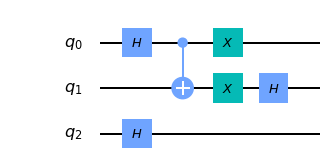

In [7]:
#original circuit
qc1=QuantumCircuit(3)
qc1.h(0)
qc1.cx(0,1)
qc1.x([0,1])
qc1.h([1,2])

qc1.draw("mpl")

In [4]:
#transpiled circuit
pi=np.pi
qc2=QuantumCircuit(3)
qc2.rz(pi/2,0)
qc2.rx(pi/2,0)
qc2.rz(pi/2,0)
qc2.rz(pi/2,1)
qc2.rx(pi/2,1)
qc2.rz(pi/2,1)
qc2.cz(0,1)
qc2.rz(pi/2,1)
qc2.rx(pi/2,1)
qc2.rz(pi/2,1)
qc2.rz(pi/2,[0,1])
qc2.rx(pi,[0,1])
qc2.rz(pi/2,[0,1])
qc2.rz(pi/2,[1,2])
qc2.rx(pi/2,[1,2])
qc2.rz(pi/2,[1,2])
qc2.draw()   #if I draw("mpl") the tomography error appear, have no idea!

┌──────────┐┌──────────┐┌──────────┐   ┌──────────┐ ┌────────┐ »
q_0: ┤ RZ(pi/2) ├┤ RX(pi/2) ├┤ RZ(pi/2) ├─■─┤ RZ(pi/2) ├─┤ RX(pi) ├─»
     ├──────────┤├──────────┤├──────────┤ │ ├──────────┤┌┴────────┴┐»
q_1: ┤ RZ(pi/2) ├┤ RX(pi/2) ├┤ RZ(pi/2) ├─■─┤ RZ(pi/2) ├┤ RX(pi/2) ├»
     ├──────────┤├──────────┤├──────────┤   └──────────┘└──────────┘»
q_2: ┤ RZ(pi/2) ├┤ RX(pi/2) ├┤ RZ(pi/2) ├───────────────────────────»
     └──────────┘└──────────┘└──────────┘                           »
«     ┌──────────┐                                                          »
«q_0: ┤ RZ(pi/2) ├──────────────────────────────────────────────────────────»
«     ├──────────┤┌──────────┐┌────────┐┌──────────┐┌──────────┐┌──────────┐»
«q_1: ┤ RZ(pi/2) ├┤ RZ(pi/2) ├┤ RX(pi) ├┤ RZ(pi/2) ├┤ RZ(pi/2) ├┤ RX(pi/2) ├»
«     └──────────┘└──────────┘└────────┘└──────────┘└──────────┘└──────────┘»
«q_2: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«                 
«q_0: ────────────
«     ┌──────────┐
«q_1: ┤ RZ(pi/2) ├
«     └──────────┘
«q_2: ────────────
«

In [4]:
#dummy transpiled circuit (non significant gates)
qc3=QuantumCircuit(3)
qc3.i(0)
qc3.h(0)
qc3.i(0)
qc3.i([0,1])
qc3.cx(0,1)
qc3.i([0,1])
qc3.i([0,1])
qc3.x([0,1])
qc3.i([0,1])
qc3.i([1,2])
qc3.h([1,2])
qc3.i([1,2])

qc3.draw()

┌───┐┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐┌───┐               
q_0: ┤ I ├┤ H ├┤ I ├┤ I ├──■──┤ I ├┤ I ├┤ X ├┤ I ├───────────────
     ├───┤└───┘└───┘└───┘┌─┴─┐├───┤├───┤├───┤├───┤┌───┐┌───┐┌───┐
q_1: ┤ I ├───────────────┤ X ├┤ I ├┤ I ├┤ X ├┤ I ├┤ I ├┤ H ├┤ I ├
     ├───┤┌───┐┌───┐     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘
q_2: ┤ I ├┤ H ├┤ I ├─────────────────────────────────────────────
     └───┘└───┘└───┘

In [4]:
#transpiled reduced circuit
pii=np.pi
qc4=QuantumCircuit(3)
qc4.rz(pii/2,0)
qc4.rx(pii/2,0)
qc4.rz(pii/2,0)
qc4.rz(pii/2,1)
qc4.rx(pii/2,1)
qc4.cz(0,1)
qc4.rz(3*pii/2,1)
qc4.rz(pii/2,0)
qc4.rx(pii,0)
qc4.rz(pii/2,0)
qc4.rz(pii/2,2)
qc4.rx(pii/2,2)
qc4.rz(pii/2,2)
qc4.draw()

┌──────────┐┌──────────┐┌──────────┐    ┌──────────┐┌────────┐┌──────────┐
q_0: ┤ RZ(pi/2) ├┤ RX(pi/2) ├┤ RZ(pi/2) ├─■──┤ RZ(pi/2) ├┤ RX(pi) ├┤ RZ(pi/2) ├
     ├──────────┤├──────────┤└──────────┘ │ ┌┴──────────┤└────────┘└──────────┘
q_1: ┤ RZ(pi/2) ├┤ RX(pi/2) ├─────────────■─┤ RZ(3pi/2) ├──────────────────────
     ├──────────┤├──────────┤┌──────────┐   └───────────┘                      
q_2: ┤ RZ(pi/2) ├┤ RX(pi/2) ├┤ RZ(pi/2) ├──────────────────────────────────────
     └──────────┘└──────────┘└──────────┘

computing the circuit trip for each

In [8]:
a=qc_trip(qc1)

In [5]:
b=qc_trip(qc2)

In [5]:
c=qc_trip(qc3)

In [5]:
d=qc_trip(qc4)

then compute the State trip as defined in the main notebook.

In [9]:
state_trip_a=[]   #a list of StateTrips for all circuit components
for i in range(len(a)):
    state_trip_a.append(trace_distance(a[0],a[i]))
state_trip_a=np.round(np.real(state_trip_a),4)   #just make the number format looks better than (0.572359378284378+10e-19j)

In [6]:
state_trip_b=[]
for i in range(len(b)):
    state_trip_b.append(trace_distance(b[0],b[i]))
state_trip_b=np.round(np.real(state_trip_b),4)

In [6]:
state_trip_c=[]
for i in range(len(c)):
    state_trip_c.append(trace_distance(c[0],c[i]))
state_trip_c=np.round(np.real(state_trip_c),4)

In [6]:
state_trip_d=[]
for i in range(len(d)):
    state_trip_d.append(trace_distance(d[0],d[i]))
state_trip_d=np.round(np.real(state_trip_d),4)

then compute the gate trip as defined in the main notebook.

In [10]:
gate_trip_a=[]
for i in range(len(a)):
    if i==0:
        gate_trip_a.append(0)
    else:
        gate_trip_a.append(trace_distance(a[i-1],a[i]))
        
gate_trip_a=np.round(np.real(gate_trip_a),4)

In [7]:
gate_trip_b=[]
for i in range(len(b)):
    if i==0:
        gate_trip_b.append(0)
    else:
        gate_trip_b.append(trace_distance(b[i-1],b[i]))
        
gate_trip_b=np.round(np.real(gate_trip_b),4)

In [7]:
gate_trip_c=[]
for i in range(len(c)):
    if i==0:
        gate_trip_c.append(0)
    else:
        gate_trip_c.append(trace_distance(c[i-1],c[i]))
        
gate_trip_c=np.round(np.real(gate_trip_c),4)

In [7]:
gate_trip_d=[]
for i in range(len(d)):
    if i==0:
        gate_trip_d.append(0)
    else:
        gate_trip_d.append(trace_distance(d[i-1],d[i]))
        
gate_trip_d=np.round(np.real(gate_trip_d),4)

Now, let's plot the state trip and Gate trip.

This will give an intuition why this method work.

Text(0, 0.5, 'Trace Distances')

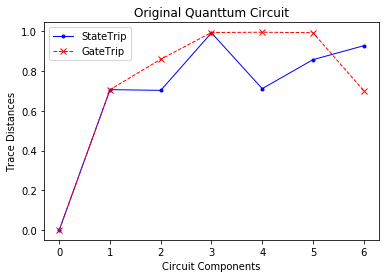

In [11]:
fig, ax = plt.subplots()
ax.plot(list(range(len(state_trip_a))), state_trip_a, linewidth=1, linestyle='-', marker='.',color="b",label="StateTrip")
ax.plot(list(range(len(gate_trip_a))), gate_trip_a, linewidth=1, linestyle='--', marker='x',color="r",label="GateTrip")
ax.legend()
ax.set_title("Original Quanttum Circuit")
ax.set_xlabel("Circuit Components")
ax.set_ylabel("Trace Distances")

Text(0, 0.5, 'Trace Distances')

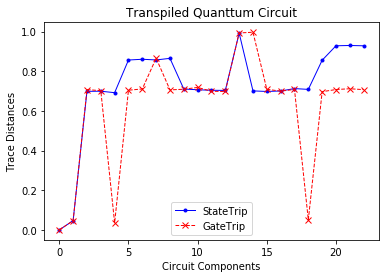

In [9]:
fig, ax = plt.subplots()
ax.plot(list(range(len(state_trip_b))), state_trip_b, linewidth=1, linestyle='-', marker='.',color="b",label="StateTrip")
ax.plot(list(range(len(gate_trip_b))), gate_trip_b, linewidth=1, linestyle='--', marker='x',color="r",label="GateTrip")
ax.legend()
ax.set_title("Transpiled Quanttum Circuit")
ax.set_xlabel("Circuit Components")
ax.set_ylabel("Trace Distances")

Text(0, 0.5, 'Trace Distances')

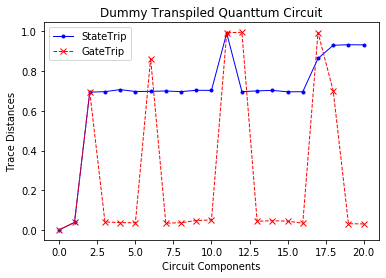

In [8]:
fig, ax = plt.subplots()
ax.plot(list(range(len(state_trip_c))), state_trip_c, linewidth=1, linestyle='-', marker='.',color="b", label="StateTrip")
ax.plot(list(range(len(gate_trip_c))), gate_trip_c, linewidth=1, linestyle='--', marker='x',color="r",label="GateTrip")
ax.legend()
ax.set_title("Dummy Transpiled Quanttum Circuit")
ax.set_xlabel("Circuit Components")
ax.set_ylabel("Trace Distances")

Text(0, 0.5, 'Trace Distances')

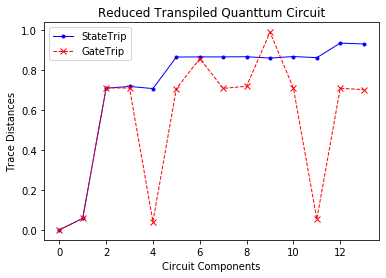

In [8]:
fig, ax = plt.subplots()
ax.plot(list(range(len(state_trip_d))), state_trip_d, linewidth=1, linestyle='-', marker='.',color="b",label="StateTrip")
ax.plot(list(range(len(gate_trip_d))), gate_trip_d, linewidth=1, linestyle='--', marker='x',color="r",label="GateTrip")
ax.legend()
ax.set_title("Reduced Transpiled Quanttum Circuit")
ax.set_xlabel("Circuit Components")
ax.set_ylabel("Trace Distances")

Now lets Compute the Involvement (as defined in the main notebook) for each.

In [12]:
from scipy.integrate import simps  #any integration will work for these simple sheped graphs

In [13]:
#involvement of the original circuit
involvement_a=simps(state_trip_a)-np.abs(simps(state_trip_a)-simps(gate_trip_a))
print("Involvement of the original circuit: ", involvement_a)

Involvement of the original circuit:  4.260900000000001


In [11]:
#involvement of the transpiled circuit
involvement_b=simps(state_trip_b)-np.abs(simps(state_trip_b)-simps(gate_trip_b))
print("Involvement of the transpiled circuit: ", involvement_b)

Involvement of the transpiled circuit:  14.3159


In [11]:
#involvement of the dummy transpiled circuit
involvement_c=simps(state_trip_c)-np.abs(simps(state_trip_c)-simps(gate_trip_c))
print("Involvement of the dummy transpiled circuit: ", involvement_c)

Involvement of the dummy transpiled circuit:  5.386966666666666


In [11]:
#involvement of the reduced transpiled circuit
involvement_d=simps(state_trip_d)-np.abs(simps(state_trip_d)-simps(gate_trip_d))
print("Involvement of the reduced transpiled circuit: ", involvement_d)

Involvement of the reduced transpiled circuit:  7.337333333333333


As we see, these results capture what I stated in the main notebook.

Finally, calculate the OverHead (as defined in the main notebook) between the 2 circuits and see how it changed.

In [12]:
#I just save the values of involvement here
involvement_a= 4.2609    #the original circuit
involvement_b= 14.3159      #the transpiled circuit
involvement_c= 5.386966666666666     #the dummy transpiled circuit
involvement_d= 7.337333333333333     #the reduced transpiled circuit

In [13]:
#transpiled circuit overhead from the original circuit
overhead_ba=involvement_b - involvement_a
print("transpiled circuit overhead from the original circuit: ", overhead_ba)

transpiled circuit overhead from the original circuit:  10.036200000000001


In [14]:
#reduced transpiled circuit overhead from the original circuit
overhead_da=involvement_d - involvement_a
print("reduced transpiled circuit overhead from the original circuit: ", overhead_da)

reduced transpiled circuit overhead from the original circuit:  3.0576333333333343


It Works Smoothly and as expected!